In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from GA_Clustering import GACluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [2]:
n_samples = 4000
n_components = 4

X, labels = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

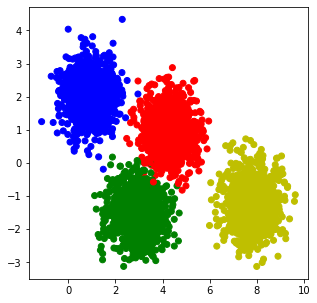

In [3]:
plt.figure(figsize=(5, 5))
colors = np.array(['r', 'b', 'g', 'y', 'p'])
plt.scatter(x=X[:, 0], y=X[:, 1], c=colors[labels])
plt.show()

### 1)

In [4]:
model = GACluster(n_clusters=4, max_iter=10, population_size=10, elitism_size=2)

<Figure size 720x180 with 0 Axes>

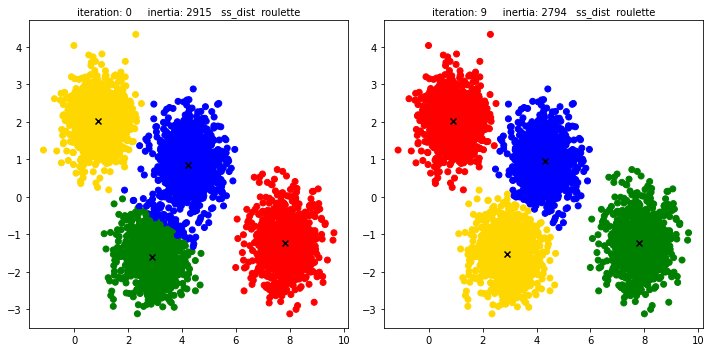

In [5]:
model.fit(X)

In [6]:
silhouette_score(X, model.labels_)

0.6749750740859763

### 2)

In [7]:
model = GACluster(n_clusters=4, max_iter=10, population_size=10, elitism_size=2,
                  category='tournament', tournament_size=3)

<Figure size 720x180 with 0 Axes>

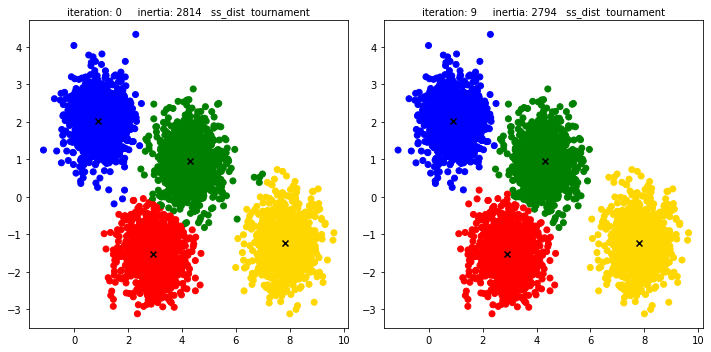

In [8]:
model.fit(X)

In [9]:
silhouette_score(X, model.labels_)

0.6749750740859763

### 3)

In [10]:
model = GACluster(n_clusters=4, max_iter=20, population_size=10, elitism_size=2, 
                  category='tournament', tournament_size=4)

<Figure size 720x360 with 0 Axes>

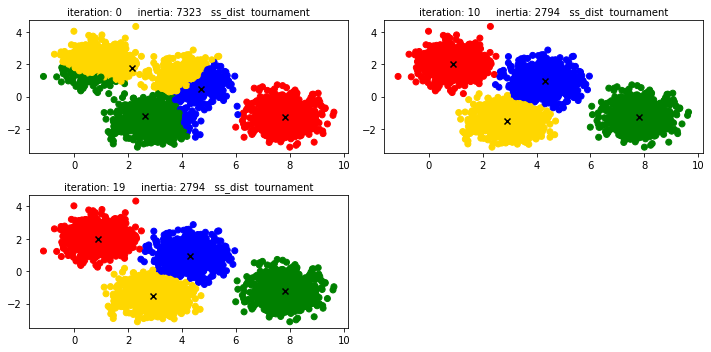

In [11]:
model.fit(X)

In [12]:
# Sileta koeficijent
silhouette_score(X, model.labels_)

0.6749750740859763

### 4)

In [13]:
model = GACluster(n_clusters=4, max_iter=10, population_size=10, elitism_size=2, 
                  category='tournament', tournament_size=4, mutation_rate=0.2)

<Figure size 720x180 with 0 Axes>

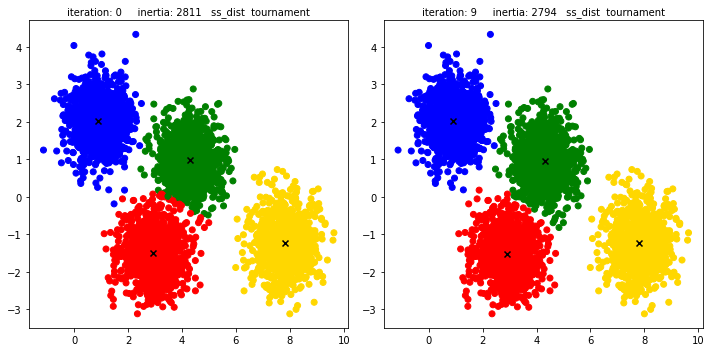

In [14]:
model.fit(X)

In [15]:
silhouette_score(X, model.labels_)

0.6749750740859763

### 5)

In [16]:
model = GACluster(n_clusters=4, max_iter=5, population_size=4, elitism_size=2, 
                  category='tournament', tournament_size=2, mutation_rate=0.1)

<Figure size 720x0 with 0 Axes>

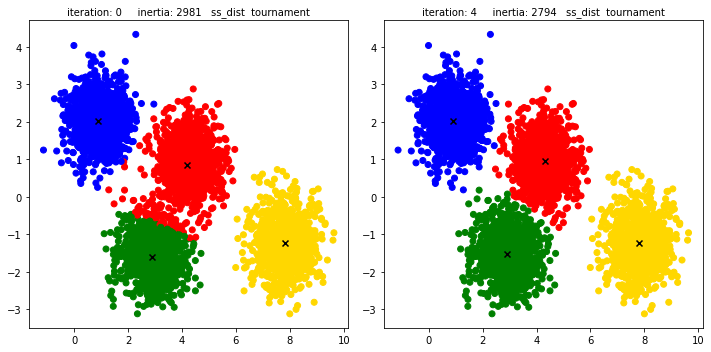

In [17]:
model.fit(X)

In [18]:
silhouette_score(X, model.labels_)

0.6749750740859763

### K Means 

In [19]:
model = KMeans(n_clusters=4)

In [20]:
model.fit(X)

KMeans(n_clusters=4)

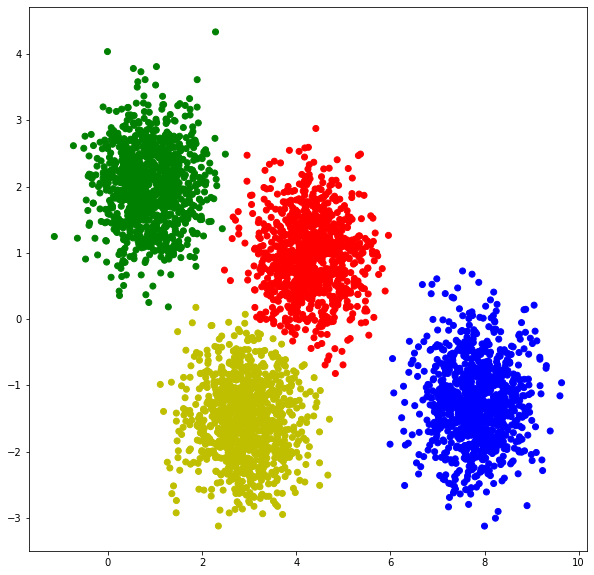

In [21]:
labels = model.labels_
plt.figure(figsize=(10, 10))
colors = np.array(['r', 'b', 'g', 'y', 'p'])
plt.scatter(x=X[:, 0], y=X[:, 1], c=colors[labels])
plt.show()

In [22]:
model.inertia_

2794.241382826836

In [23]:
silhouette_score(X, model.labels_)

0.6749750740859763

## Posmatrajmo kako radi algoritam za 3 klastera

In [24]:
model = GACluster(n_clusters=3, max_iter=10, population_size=4, elitism_size=2,
                  category='tournament', tournament_size=2)

<Figure size 720x180 with 0 Axes>

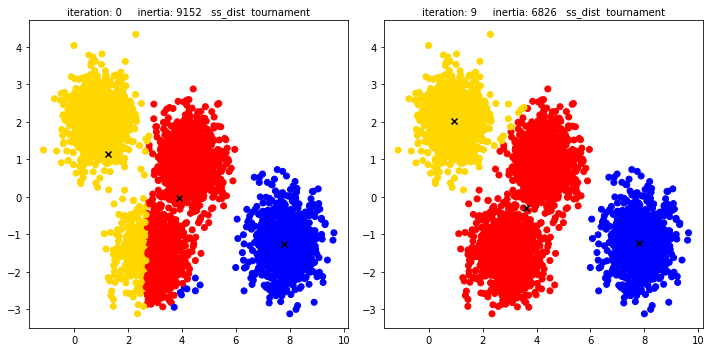

In [25]:
model.fit(X)

In [26]:
model.inertia_

6826.126715327275

In [27]:
silhouette_score(X, model.labels_)

0.5988230052107831

### KMeans

In [28]:
model = KMeans(n_clusters=3)

In [29]:
model.fit(X)

KMeans(n_clusters=3)

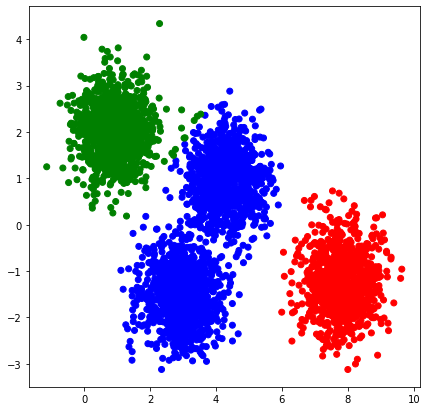

In [30]:
labels = model.labels_
plt.figure(figsize=(7, 7))
colors = np.array(['r', 'b', 'g', 'y', 'p'])
plt.scatter(x=X[:, 0], y=X[:, 1], c=colors[labels])
plt.show()

In [31]:
model.inertia_ #Potpuno iste rezultati su dobijeni

6826.126715327277

In [32]:
silhouette_score(X, model.labels_)

0.5988230052107831

## Rezultati - najbolji koji su dobijeni za 4 klastera

| max_iter | pop_size | category | t_size | mutation_rate | elitism_size |    sse   | silhouette_coef |  K_Means_SSE | K_means silhouette
| :------: | :------: | :-------:| :-----:| :-----------: | :-----------:| :-----------:| :-----------:|:-----------:|:-----------:|
| 10      |    10    | roulette |  /     |   0.05        |      2       |    2794         |   0.67 | 2794 | 0.67 |
| 10      |    10    | tournament |  3     |   0.05        |      2       |    2794         |   0.67 | 2794 | 0.67 |
| 20      |    10    | tournament |  4     |   0.05        |      2       |    2794         |   0.67 | 2794 | 0.67 |
| 10      |    10    | tournament |    4   |   0.2        |      2       |    2794         |   0.67 | 2794 | 0.67 |
| 5      |    4    | tournament |    2   |   0.1        |      2       |    2794         |   0.67 | 2794 | 0.67 |


## Rezultati - najbolji koji su dobijeni za 3 klastera

| max_iter | pop_size | category | t_size | mutation_rate | elitism_size |    sse   | silhouette_coef |  K_Means_SSE | K_means silhouette
| :------: | :------: | :-------:| :-----:| :-----------: | :-----------:| :-----------:| :-----------:|:-----------:|:-----------:|
| 10      |    4    | tournament |  2    |   0.05        |      2       |    6826         |   0.6 | 6826 | 0.6 |
